In [1]:
using GLMakie
include("gdeep.jl");

In [2]:
function generate_matrices(xv, zv)
    G = zeros(ComplexF64, length(xv), length(zv))
    Gx = zeros(ComplexF64, length(xv), length(zv))
    Gz = zeros(ComplexF64, length(xv), length(zv))
    Gxx = zeros(ComplexF64, length(xv), length(zv))
    Gzz = zeros(ComplexF64, length(xv), length(zv))
    Gxz = zeros(ComplexF64, length(xv), length(zv))
    
    for (j, z) in enumerate(zv)
        for (i, x) in enumerate(xv)
            Gw, gradG, hessG = Gᵈᵉᵉᵖ(P, [x, z], K)
            G[i, j] = Gw
            Gx[i, j] = gradG[1]
            Gz[i, j] = gradG[2]
            Gxx[i, j] = hessG[1,1]
            Gzz[i, j] = hessG[2,2]
            Gxz[i, j] = hessG[1,2]
        end
    end

    return (G, Gx, Gz, Gxx, Gzz, Gxz)
end


function plot_surface(xv, yv, Z, d)
    ds = length(d) > 0 ? "_{" * d * "}" : ""
    ax1_title = L"\mathfrak{Re}(G%$ds)"
    ax2_title = L"\mathfrak{Im}(G%$ds)"
    
    fig = Figure(size=(700, 300), figure_padding=10)
    
    limits = (minimum(xv), maximum(xv), minimum(zv), maximum(zv), -7, 7)
    
    ax1 = Axis3(fig[1, 1], title=ax1_title, titlesize=20, ylabel="z", zlabel="", limits=limits)
    ax2 = Axis3(fig[1, 2], title=ax2_title, titlesize=20, ylabel="z", zlabel="", limits=limits)
    
    surface!(ax1, xv, zv, real(Z), colormap=:viridis, colorrange=limits[5:6])
    surface!(ax2, xv, zv, imag(Z), colormap=:plasma, colorrange=limits[5:6])
    
    save("G"*d*".png", fig)
    fig
end


P = [0.0, -2.0]  # Source position
K = 1.0  # Infinite depth wavenumber

xv = LinRange(-10, 10, 200)
zv = LinRange(-6, -0.99*P[2], 200)
G, Gx, Gz, Gxx, Gzz, Gxz = generate_matrices(xv, zv);

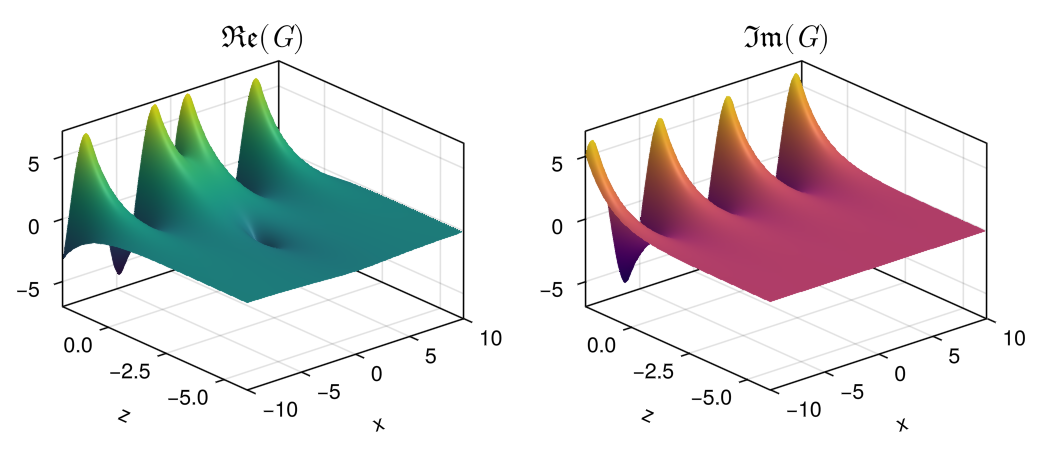

In [3]:
plot_surface(xv, zv, G, "")

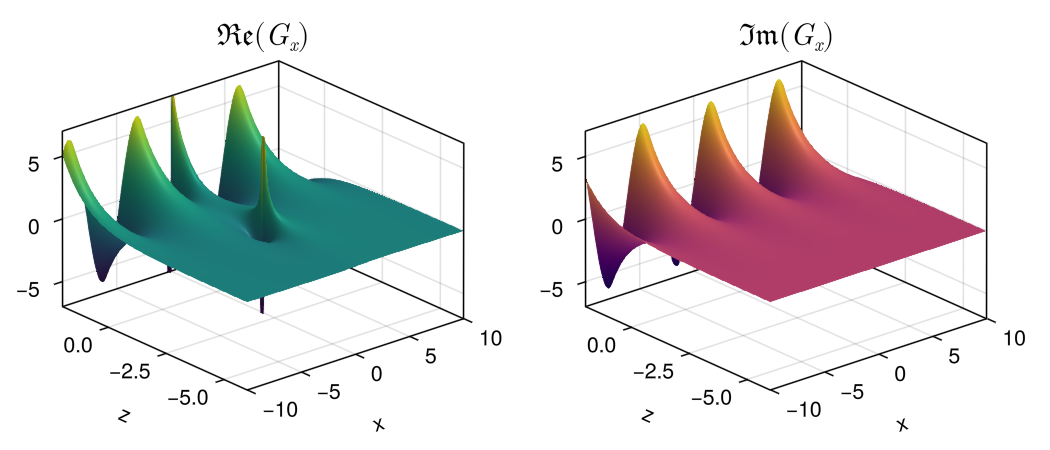

In [4]:
plot_surface(xv, zv, Gx, "x")

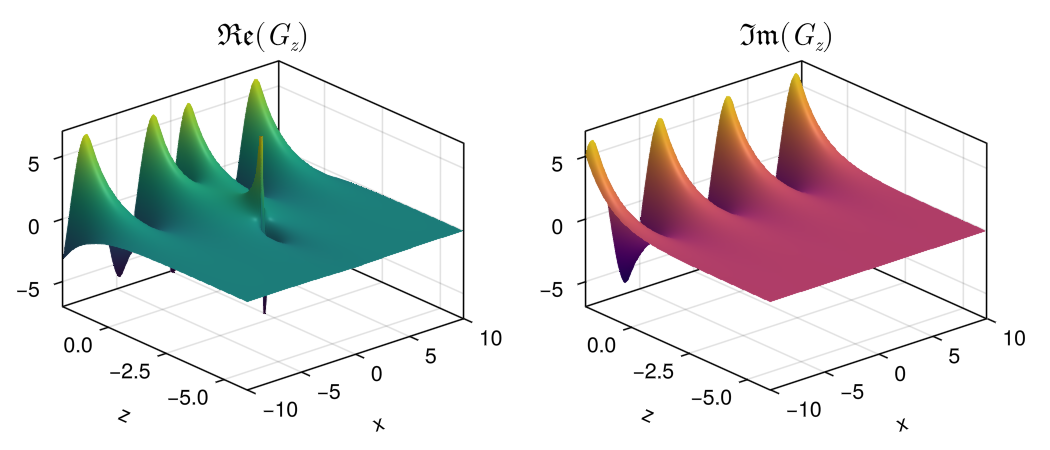

In [5]:
plot_surface(xv, zv, Gz, "z")

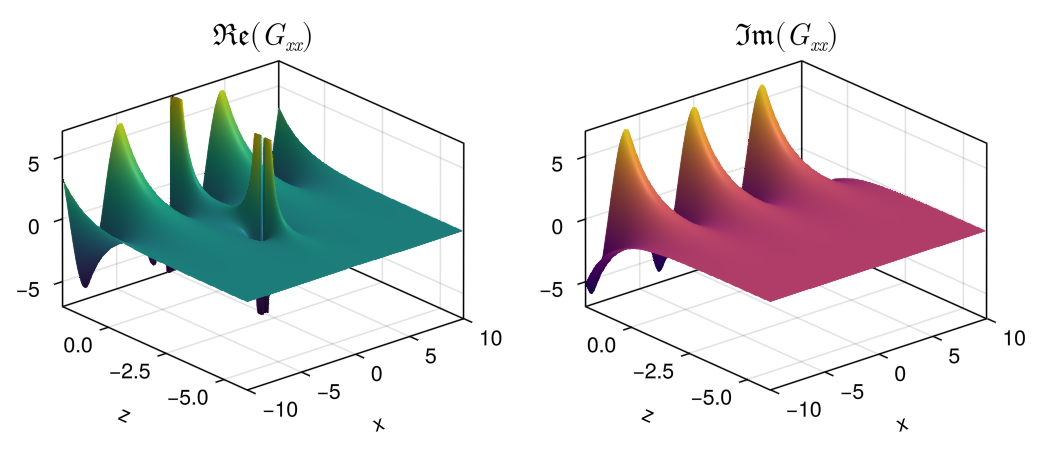

In [6]:
plot_surface(xv, zv, Gxx, "xx")

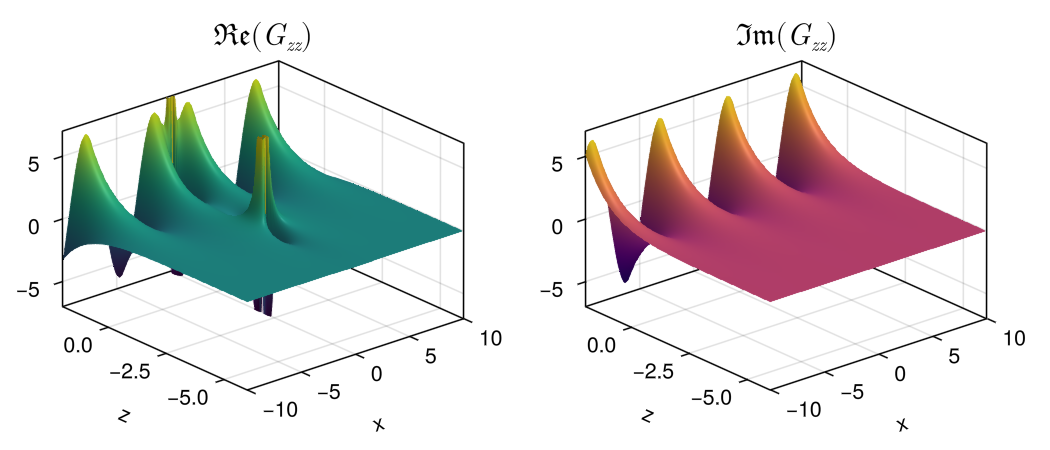

In [7]:
plot_surface(xv, zv, Gzz, "zz")

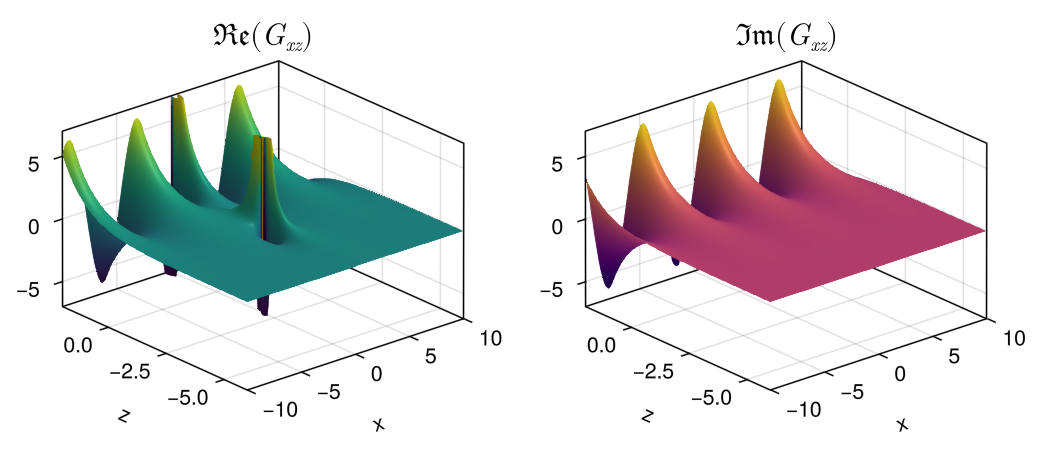

In [8]:
plot_surface(xv, zv, Gxz, "xz")